# TASK 2

## Use Clustering Techniques for the any customer dataset using machine learning

The dataset is an Online Retail data of a UK based retail. From the outlook of the products listed, the company looks like it sells gift based items for various ocassions. 

The dataset contains the purchase transactions for the given duration - 01/Dec/2010 and 09/Dec/2011 

The parameters included are :

1) InvoiceNo	
2) StockCode	
3) Description	
4) Quantity	
5) InvoiceDate	
6) UnitPrice	
7) CustomerID	
8) Country


## Our Task

Clustering Techniques for customer dataset using machine learning
An RFM analysis on the company's customers is used and clustering is done to understand the customers' purchase preference.

Process :-

1: Reading and Understanding Data 

2: Visualizing and Data Cleaning

3: Data Preparation

4: Building K-Means Model and clustering

5: Inference

# Step 1- Reading and Understanding Data

### Importing libraries

In [1]:
# import required libraries for dataframe and visualization
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
from collections import Counter

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# import required libraries for clustering
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# load data
df = pd.read_csv('OnlineRetail.csv',  encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
# shape
df.shape

(541909, 8)

In [4]:
# data description
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.000000,9.552250,218.081158,-80995.000000,1.000000,3.000000,10.000000,80995.000000
UnitPrice,541909.000000,4.611114,96.759853,-11062.060000,1.250000,2.080000,4.130000,38970.000000
CustomerID,406829.000000,15287.690570,1713.600303,12346.000000,13953.000000,15152.000000,16791.000000,18287.000000


From the above description it is clear that negative and missing values are present. 

In [5]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# Finding the count of null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# Dropping unwanted columns from the dataset
df_new = df.drop(['StockCode', 'Description', 'Country'], axis=1)
df_new.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,01-12-2010 08:26,2.55,17850.0
1,536365,6,01-12-2010 08:26,3.39,17850.0
2,536365,8,01-12-2010 08:26,2.75,17850.0
3,536365,6,01-12-2010 08:26,3.39,17850.0
4,536365,6,01-12-2010 08:26,3.39,17850.0


In [8]:
# Creating a new attribute sale
df_new["Amount"] = df_new.Quantity * df_new.UnitPrice
df_new.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Amount
0,536365,6,01-12-2010 08:26,2.55,17850.0,15.30
1,536365,6,01-12-2010 08:26,3.39,17850.0,20.34
2,536365,8,01-12-2010 08:26,2.75,17850.0,22.00
3,536365,6,01-12-2010 08:26,3.39,17850.0,20.34
4,536365,6,01-12-2010 08:26,3.39,17850.0,20.34


# Step 2 : Visualizing and Data Cleaning

In [9]:
# Dropping of rows with missing values
df_new = df_new.dropna()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   Quantity     406829 non-null  int64  
 2   InvoiceDate  406829 non-null  object 
 3   UnitPrice    406829 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Amount       406829 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 21.7+ MB


In [10]:
df_new.isnull().sum() #no null values

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Amount         0
dtype: int64

<AxesSubplot:xlabel='Quantity'>

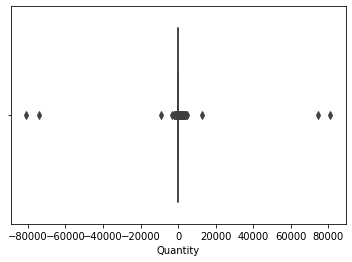

In [11]:
# visualizing each variables
sns.boxplot(x=df_new['Quantity'])

<AxesSubplot:xlabel='UnitPrice'>

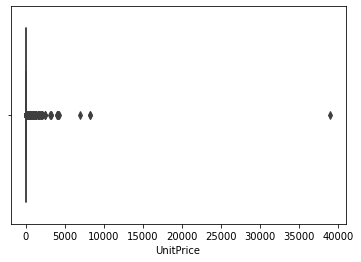

In [12]:
sns.boxplot(x=df_new['UnitPrice'])

In [13]:
df_new.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.000000,12.061303,248.693370,-80995.000000,2.000000,5.000000,12.000000,80995.000000
UnitPrice,406829.000000,3.460471,69.315162,0.000000,1.250000,1.950000,3.750000,38970.000000
CustomerID,406829.000000,15287.690570,1713.600303,12346.000000,13953.000000,15152.000000,16791.000000,18287.000000
Amount,406829.000000,20.401854,427.591718,-168469.600000,4.200000,11.100000,19.500000,168469.600000


In [14]:
df_new = df_new.loc[df["Quantity"]>0]
df_new = df_new.loc[df["UnitPrice"]>-1]

In [15]:
df_new.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Quantity,397924.000000,13.021823,180.420210,1.000000,2.000000,6.000000,12.000000,80995.000000
UnitPrice,397924.000000,3.116174,22.096788,0.000000,1.250000,1.950000,3.750000,8142.750000
CustomerID,397924.000000,15294.315171,1713.169877,12346.000000,13969.000000,15159.000000,16795.000000,18287.000000
Amount,397924.000000,22.394749,309.055588,0.000000,4.680000,11.800000,19.800000,168469.600000


In [16]:
# Change data type of Customer Id; they are not numeric in essence
df_new['CustomerID'] = df_new['CustomerID'].astype(int)

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   Quantity     397924 non-null  int64  
 2   InvoiceDate  397924 non-null  object 
 3   UnitPrice    397924 non-null  float64
 4   CustomerID   397924 non-null  int64  
 5   Amount       397924 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 21.3+ MB


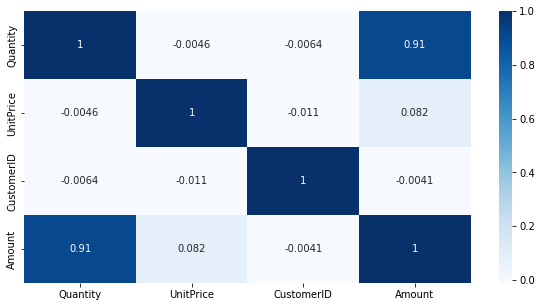

In [18]:
plt.figure(figsize=(10,5))
cor = df_new.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

# Step 3 : Data Preparation

Using the RFM factors the analysis of the Customers transactions were clustered:

R (Recency)  :  Number of days since previously purchase 

F (Frequency) : Number of transactions 

M (Monetary)  : Total spending by the customers (revenue)

In [47]:
# Calculate amount (monetary)

monetary = df_new.groupby('CustomerID', as_index=False)['Amount'].sum()
monetary.columns = ['CustomerID', 'Amount']
monetary.head()

,CustomerID,Amount
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [48]:
#Calculate frequency

frequency = df_new.groupby('CustomerID', as_index=False)['InvoiceNo'].count()
frequency.columns = ['CustomerID', 'Frequency']
frequency.head()

,CustomerID,Frequency
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17


In [49]:
# Reformat datetime

df_new['InvoiceDate'] = pd.to_datetime(df_new['InvoiceDate'], format='%d-%m-%Y %H:%M')
df_new.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Amount,Diff
0,536365,6,2010-12-01 08:26:00,2.55,17850,15.30,373
1,536365,6,2010-12-01 08:26:00,3.39,17850,20.34,373
2,536365,8,2010-12-01 08:26:00,2.75,17850,22.00,373
3,536365,6,2010-12-01 08:26:00,3.39,17850,20.34,373
4,536365,6,2010-12-01 08:26:00,3.39,17850,20.34,373


In [50]:
# Calculate recency

LastDate = max(df_new.InvoiceDate)
LasDate = LastDate + pd.DateOffset(days = 1)
df_new['Diff'] = LastDate - df_new.InvoiceDate
df_new['Diff'] = df_new['Diff'].dt.days

recency = df_new.groupby('CustomerID', as_index=False)['Diff'].min()

recency.columns = ['CustomerID', 'Recency']
recency.head()

,CustomerID,Recency
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309


In [59]:
RMF = monetary.merge(frequency, on = "CustomerID")
RMF = RMF.merge(recency, on = "CustomerID")
RMF.columns = ["CustomerID", "Amount", "Frequency", "Recency"]
RMF

,CustomerID,Amount,Frequency,Recency
0,12346,77183.60,1,325
1,12347,4310.00,182,1
2,12348,1797.24,31,74
3,12349,1757.55,73,18
4,12350,334.40,17,309
...,...,...,...,...
4334,18280,180.60,10,277
4335,18281,80.82,7,180
4336,18282,178.05,12,7
4337,18283,2094.88,756,3


In [60]:
RMF1 = pd.DataFrame(RMF,columns= ["Amount","Frequency","Recency"])
RMF1

,Amount,Frequency,Recency
0,77183.60,1,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309
...,...,...,...
4334,180.60,10,277
4335,80.82,7,180
4336,178.05,12,7
4337,2094.88,756,3


In [62]:
# Standardize data
from sklearn.preprocessing import StandardScaler

# Store original column names
keys = RMF1.columns

# Scale RMF1
scaler = StandardScaler()
RMF2 = scaler.fit_transform(RMF1)

# Create a DataFrame with the scaled data and original column names
RMF3 = pd.DataFrame(RMF2, columns=keys)
RMF3.head()

,Amount,Frequency,Recency
0,8.359634,-0.396512,2.334858
1,0.251046,0.394688,-0.905199
2,-0.028546,-0.265374,-0.175186
3,-0.032963,-0.081781,-0.735196
4,-0.191315,-0.326572,2.174855


In [64]:
RMF3.describe()

,Amount,Frequency,Recency
count,4.339000e+03,4.339000e+03,4.339000e+03
mean,-4.093931e-17,-1.146301e-17,7.532834e-17
std,1.000115e+00,1.000115e+00,1.000115e+00
min,-2.285239e-01,-3.965121e-01,-9.151995e-01
25%,-1.943370e-01,-3.265718e-01,-7.451965e-01
50%,-1.534784e-01,-2.216614e-01,-4.151906e-01
75%,-4.363455e-02,3.624356e-02,4.948256e-01
max,3.094978e+01,3.390047e+01,2.814867e+00


In [65]:
# Remove outlier values outside mean +/- 3 std range
for key in RMF3.keys():
    mean = np.mean(RMF3[key])
    std = np.std(RMF3[key])
    RMF3 = RMF3[np.abs(RMF3[key] - mean) / std <= 3]

In [66]:
RMF3.describe()

,Amount,Frequency,Recency
count,4225.000000,4225.000000,4225.000000
mean,-0.077034,-0.090643,0.020431
std,0.242705,0.361416,1.003236
min,-0.228524,-0.396512,-0.915199
25%,-0.194856,-0.326572,-0.735196
50%,-0.156142,-0.230404,-0.395190
75%,-0.057640,0.005645,0.544826
max,2.970923,1.644871,2.814867


<a id="4"></a> <br>
## Step 4 : Building K-Means Model & Clustering

In [67]:
# Draw elbow curve to find optimal K value
# 2 <= i <= 10
inertia = {}
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, max_iter=1000)
    kmeans.fit(RMF3)
    inertia[i] = kmeans.inertia_

for k, v in inertia.items():
    print(str(k), ': ', str(v))

2 :  1613.8859836835309
3 :  1141.7945908458803
4 :  747.4978438459059
5 :  583.6813115467926
6 :  494.3857724173863
7 :  416.9952847502816
8 :  351.97457381382304
9 :  309.5054590877716
10 :  285.54012683815034


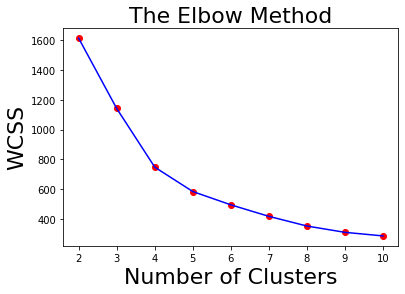

In [79]:
plt.plot(np.arange(2,11), list(inertia.values()), color = "blue")
plt.scatter(np.arange(2,11), list(inertia.values()), color = "red")
plt.title('The Elbow Method',fontsize=22)
plt.xlabel('Number of Clusters', fontsize=22)
plt.ylabel('WCSS', fontsize=22)
plt.show()  #Display Graph

The elbow curve is close to a linear function after K value of 3, which indicates that adding more centroids may not result in better clustering outcomes. Therefore, K should be set to 3 according to the elbow curve.

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

**Rule: Higher score is better.**

In [82]:
# # Silhouette analysis
for num_clusters in range(2,10):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(RMF3)
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(RMF3, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1:.4f}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6385
For n_clusters=3, the silhouette score is 0.5055
For n_clusters=4, the silhouette score is 0.5006
For n_clusters=5, the silhouette score is 0.4359
For n_clusters=6, the silhouette score is 0.4176
For n_clusters=7, the silhouette score is 0.4133
For n_clusters=8, the silhouette score is 0.4175
For n_clusters=9, the silhouette score is 0.4039


Although K=2 is the number of K with the highest score, from the perspective of business and for easier interpretation, we continue to adopt 3 as the K value. 
You will see how K=3 works out in the later sections of this article.

In [83]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=1000)
kmeans.fit(RMF3)
print(kmeans.labels_)

[0 0 0 ... 2 0 0]


In [85]:
# Assign label
RMF3['Cluster_Id'] = kmeans.labels_
print(RMF3.shape)
RMF3

(4225, 4)


,Amount,Frequency,Recency,Cluster_Id
1,0.251046,0.394688,-0.905199,0
2,-0.028546,-0.265374,-0.175186,0
3,-0.032963,-0.081781,-0.735196,0
4,-0.191315,-0.326572,2.174855,1
5,0.050321,-0.029325,-0.565193,0
...,...,...,...,...
4333,-0.209174,-0.361542,-0.185187,0
4334,-0.208429,-0.357171,1.854850,1
4335,-0.219531,-0.370285,0.884833,2
4336,-0.208712,-0.348428,-0.845198,0


Text(0.5, 1.0, 'Clustering: Frequency vs Recency')

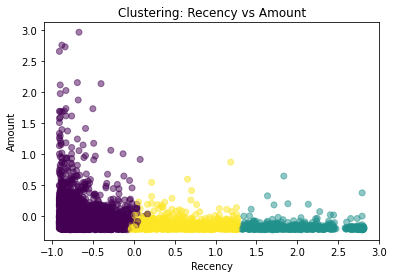

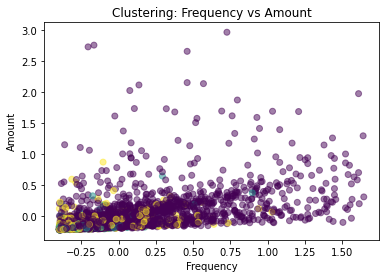

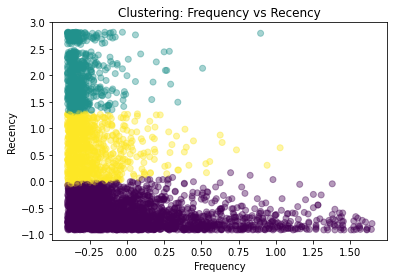

In [97]:
# Scatter plot
plt.subplots()
plt.scatter(x=RMF3['Recency'], y=RMF3['Amount'], c=RMF3['Cluster_Id'], alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Amount')
plt.title("Clustering: Recency vs Amount")

plt.subplots()
plt.scatter(x=RMF3['Frequency'], y=RMF3['Amount'], c=RMF3['Cluster_Id'], alpha=0.5)
plt.xlabel('Frequency')
plt.ylabel('Amount')
plt.title("Clustering: Frequency vs Amount")

plt.subplots()
plt.scatter(x=RMF3['Frequency'], y=RMF3['Recency'], c=RMF3['Cluster_Id'], alpha=0.4)
plt.xlabel('Frequency')
plt.ylabel('Recency')
plt.title("Clustering: Frequency vs Recency")

draw a 3D plot to visualize which group our customers belong to, after we computing three variables of R, F, and M? 

Text(0.5, 0, 'Amount')

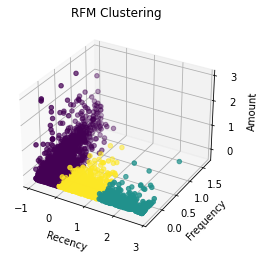

In [92]:
# Create 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=RMF3['Recency'], ys=RMF3['Frequency'], zs=RMF3['Amount'], c=RMF3['Cluster_Id'])

plt.title('RFM Clustering')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Amount')

# Qualitative Analysis of Clustering Result
This 3D scatter graph clearly shows that our K-Means clustering algorithm has successfully segmented all customers into three distinct categories:

* Category 1: 
<span style="color:green">Color: green </span>

Number: quite a lot

Purchase frequency: low

Amount of spending: low

Recency: vary



* Category 2:  Color: purple

Number: many 

Purchase frequency: low to mid

Amount of spending: low to mid

Recency: low


* Category 3:   Color: yellow

Number: few

Purchase frequency: vary

Amount of spending: high

Recency: low
